# Github Repo Classification


In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
import sklearn

import sys
import os

from main import normalize_data
from metrics.githubMetrics import GithubMetrics, metricCollection
from importer.datasetImporter import DatasetImporter

## Data Aggregation

In [2]:
def aggregate_data(repo_links):
    metrics_data = []
    for link in repo_links:
        github_metrics = GithubMetrics(link)
        metrics_data.append([link] + [github_metrics.get(m) for m in metrics])

    return pd.DataFrame(data=metrics_data, columns=['repo'] + metrics)

In [3]:
importer = DatasetImporter('data/testset.csv')
X_unnorm = importer.data
y = importer.target
X = normalize_data(X_unnorm)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

X[:5]

,is_io_page,avg_folder_depth,hw_terminology_commits,open_issue_count,hw_terminology_files,edu_mail_ratio,watcher_count,forks_count,file_folder_ratio,repo_size,avg_entropy,file_count,html_count,up_to_dateness
0,0.0,0.253733,0.631514,0.639894,0.000000,0.007613,0.772247,0.568263,0.330250,0.752535,0.286807,0.405086,0.000000,0.000086
1,0.0,0.333086,0.000000,0.151507,0.000000,0.000000,0.752640,0.534210,0.086028,0.369789,0.284243,0.138886,0.000000,0.043897
2,0.0,0.236519,0.360522,0.000000,0.000000,0.016060,0.000000,0.000000,0.274775,0.734472,0.445036,0.484467,0.328676,0.015705
3,0.0,0.736634,0.000000,0.000000,0.195343,0.000000,0.000000,0.000000,0.169127,0.373389,0.270876,0.344582,0.000000,0.008122
4,0.0,0.534729,0.088202,0.000000,0.000000,0.034765,0.000000,0.000000,0.209958,0.508392,0.293983,0.349585,0.000000,0.251397


In [4]:
X_unnorm[:5]

,is_io_page,avg_folder_depth,hw_terminology_commits,open_issue_count,hw_terminology_files,edu_mail_ratio,watcher_count,forks_count,file_folder_ratio,repo_size,avg_entropy,file_count,html_count,up_to_dateness
0,0,2.250000,142,348,0,0.005291,4769,646,9.661538,77702,0.607567,628,0,2.605221e+04
1,0,2.625000,0,3,0,0.000000,3846,438,2.120000,252,0.606200,53,0,1.104032e+07
2,0,2.173913,16,0,0,0.011194,0,0,7.064865,59299,0.691902,1307,33,3.952726e+06
3,0,5.316667,0,0,2,0.000000,0,0,3.739583,266,0.599076,359,0,2.046372e+06
4,0,3.784314,1,0,0,0.024390,0,0,4.820513,2012,0.611392,376,0,6.320647e+07


## Visualizations

we want to compare stuff

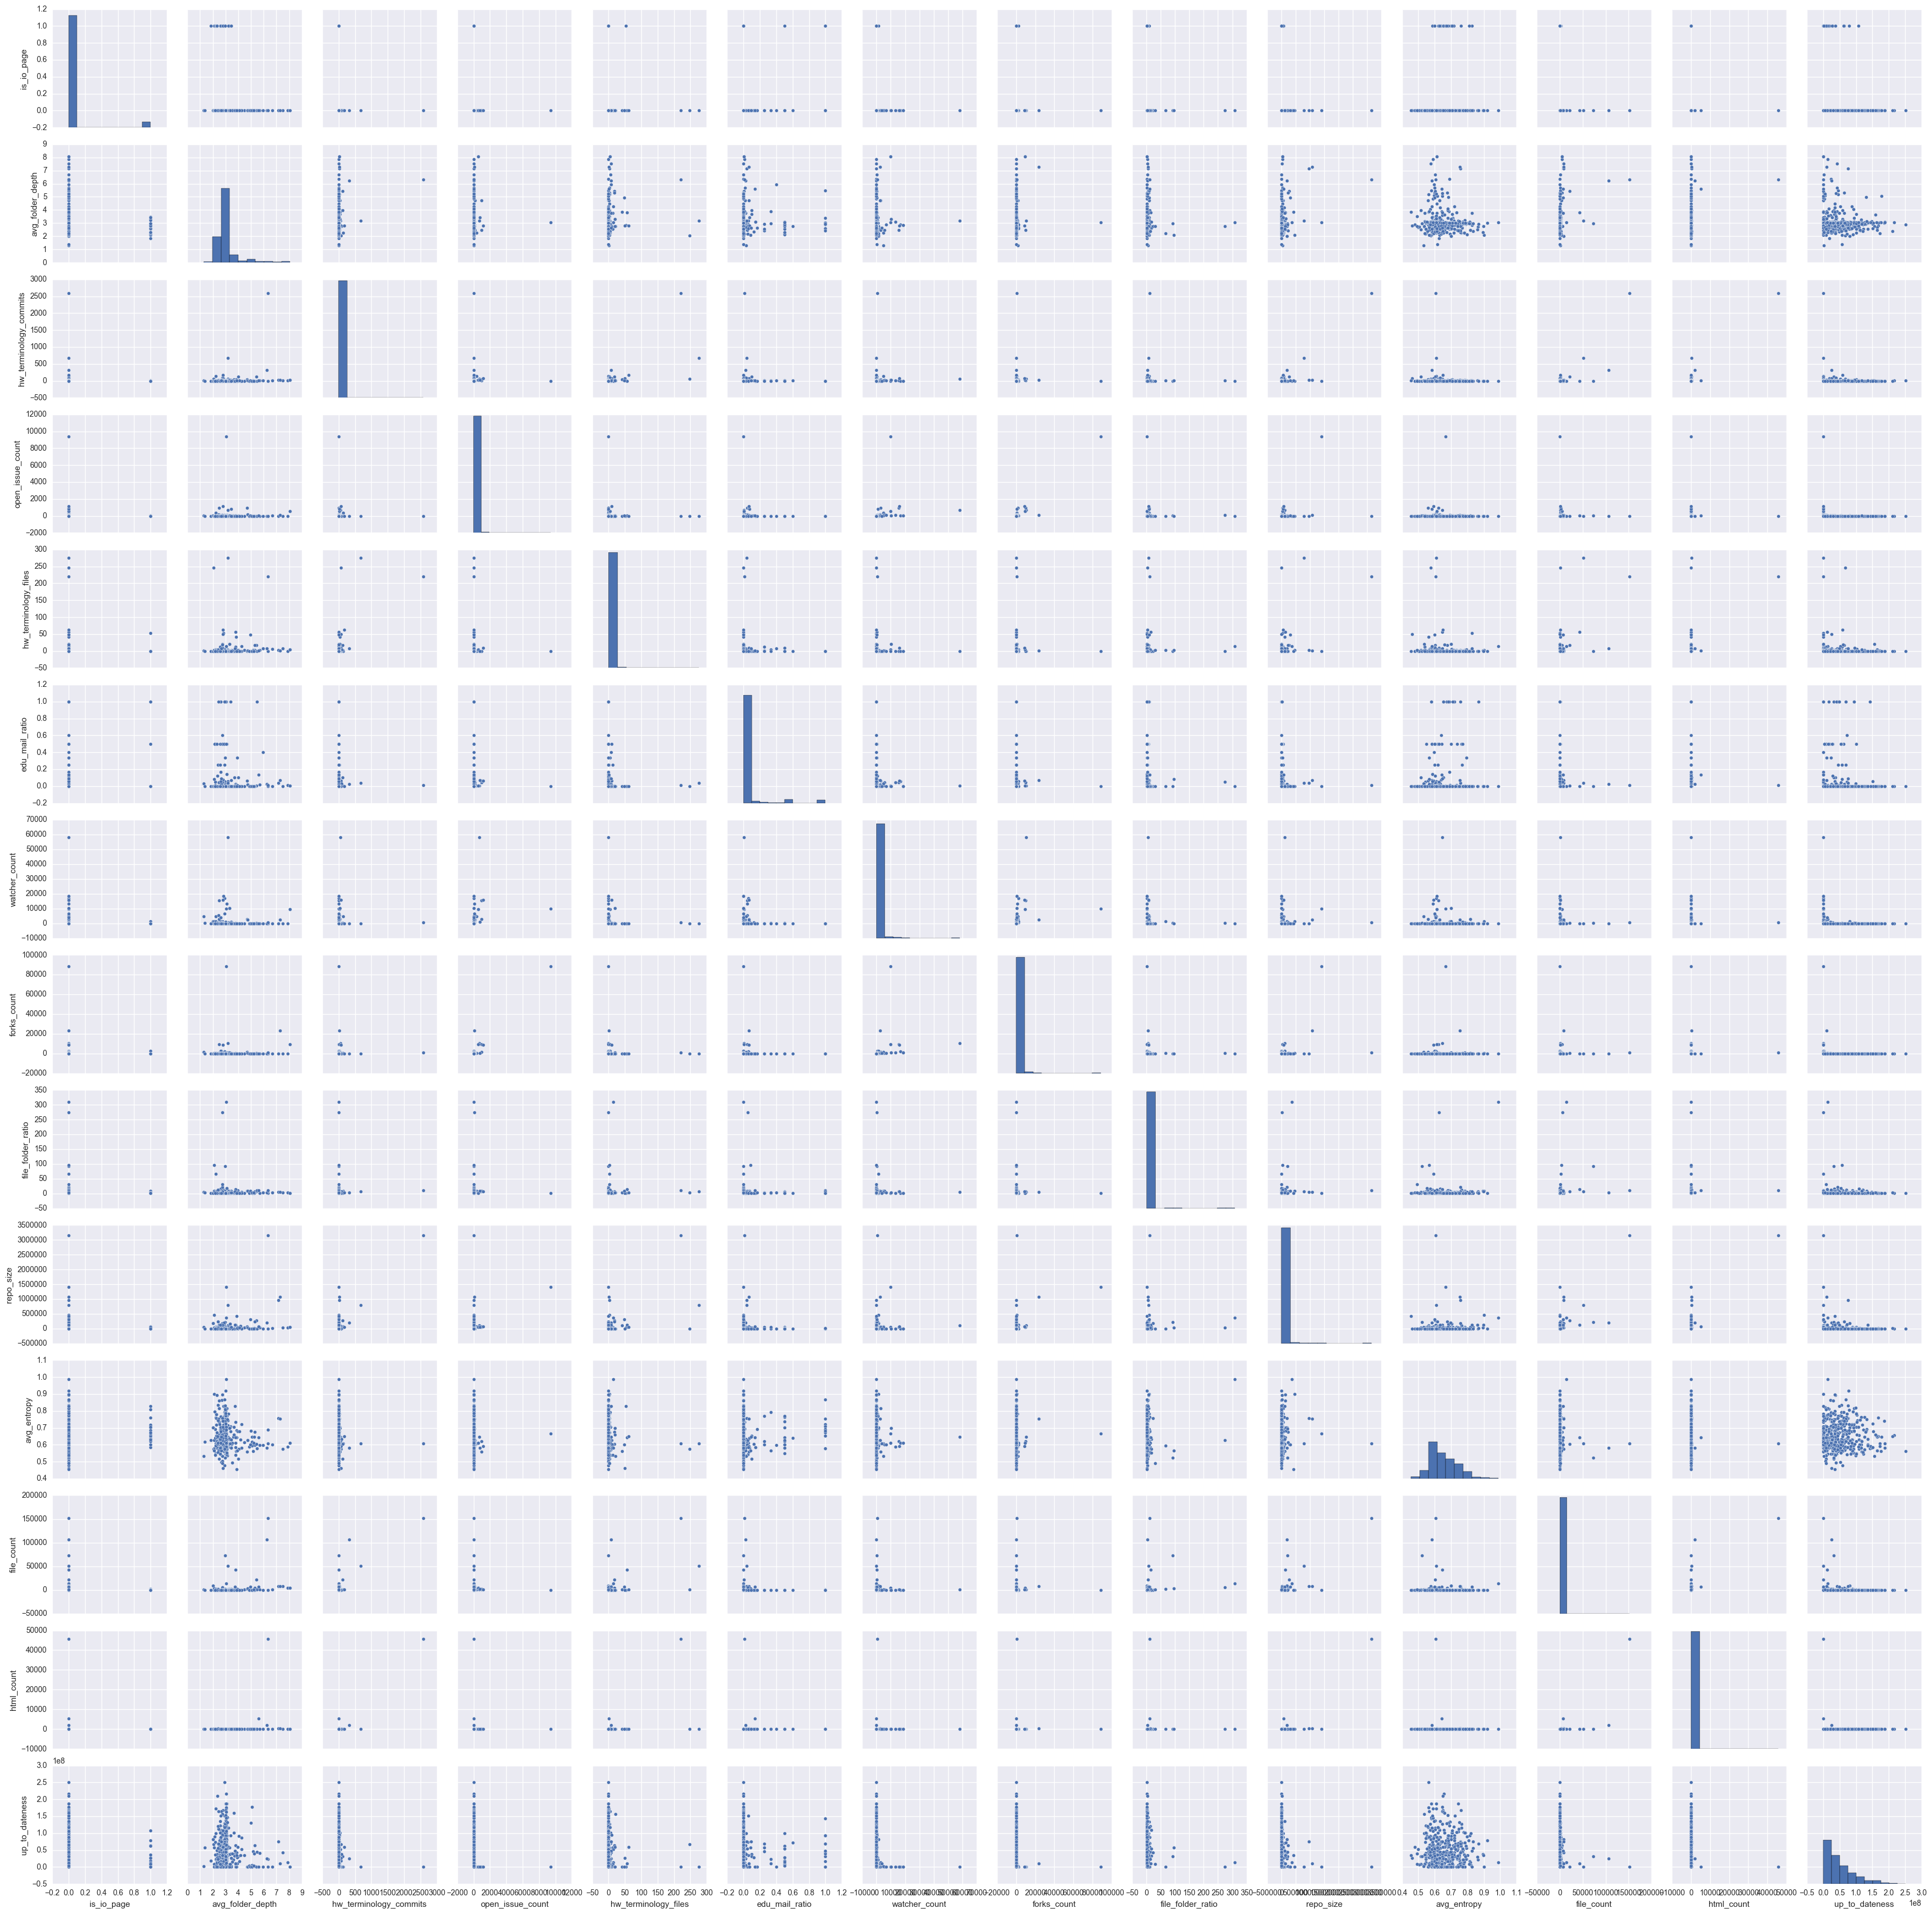

In [5]:
std_scaler = sklearn.preprocessing.StandardScaler()
sbn.pairplot(X_unnorm)

In [6]:
metric_list = list(metricCollection.keys())

In [7]:
X['hw_terminology_commits'].describe()

count    448.000000
mean       0.079566
std        0.151185
min        0.000000
25%        0.000000
50%        0.000000
75%        0.088202
max        1.000000
Name: hw_terminology_commits, dtype: float64

In [12]:
def boxplots(data, y_data):
    h = math.ceil(len(metric_list) / 2)
    fig, axes = plt.subplots(nrows=h, ncols=2, figsize=(16, 20))
    for i, metric in enumerate(metric_list):
        x = i % 2
        y = int(i / 2)
        data_per_metric = data[metric]
        
        classes = np.unique(y_data)
        data_per_class = []
        for cls in classes:
            data_per_class.append(data_per_metric[y_data == cls])
        
        axes[y, x].boxplot(data_per_class, labels=classes)
        axes[y, x].set_title(metric)
        axes[y, x].set_ylim([-0.2, 1.1])

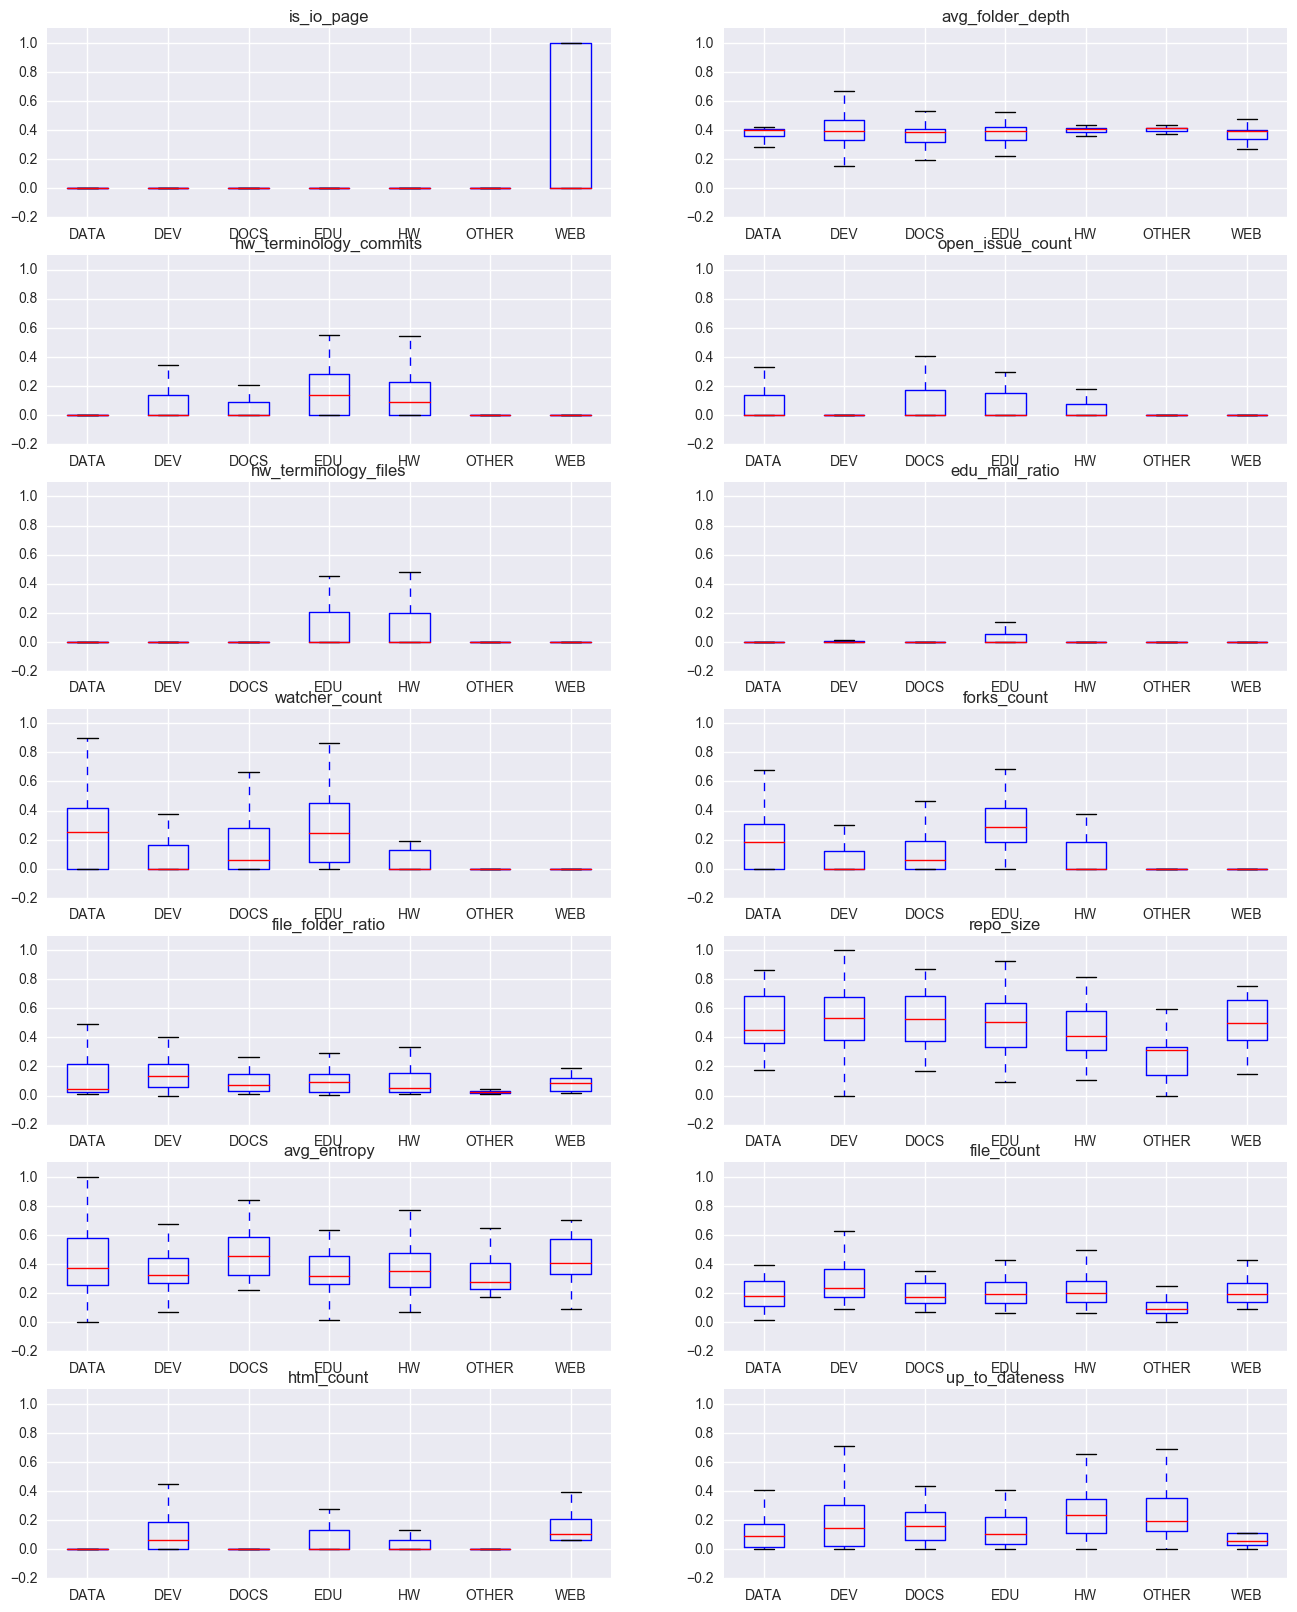

In [13]:
boxplots(X, y)

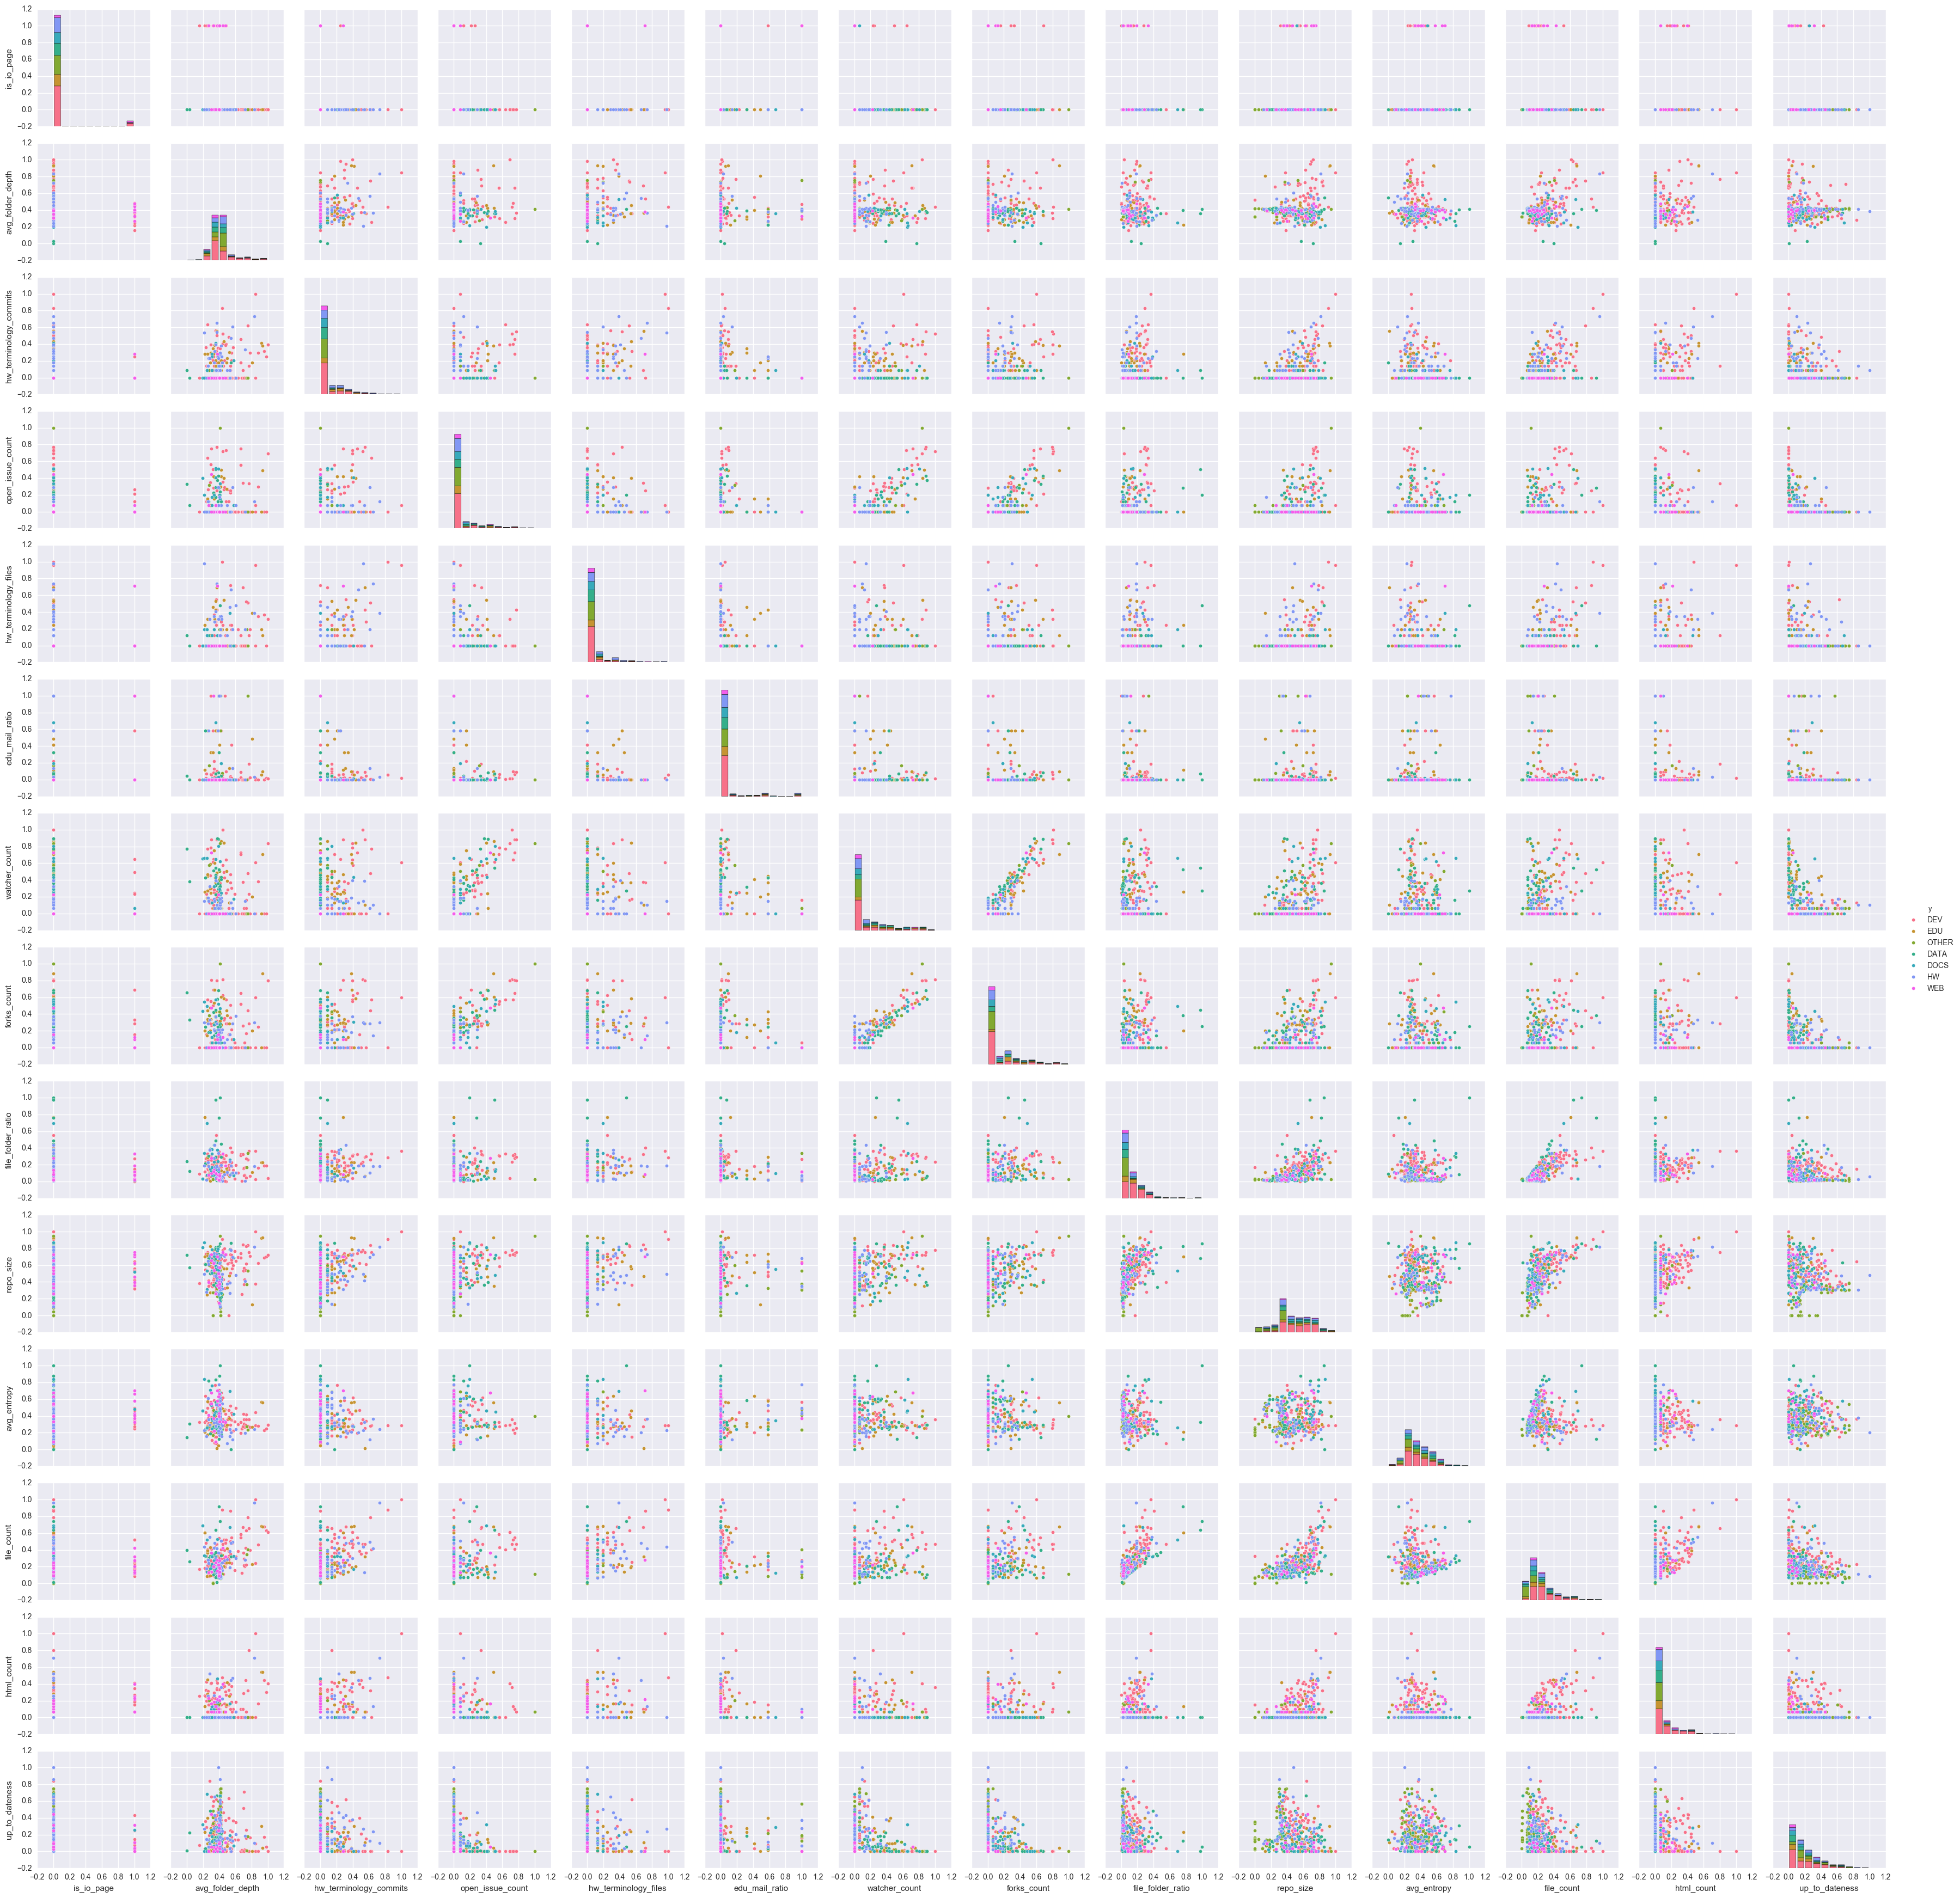

In [10]:
plot_data = X
plot_data['y'] = y
pplot = sbn.pairplot(plot_data, hue='y')
#pplot.savefig('colored_pairplot.png')

In [15]:
#fig = plt.figure(figsize=(16,8))
def bar_plots(data):
    f, axarr = plt.subplots(len(metricCollection), sharex=True, figsize=(16,20))

    index = np.arange(len(data))
    for i, metric in enumerate(metricCollection):
        ax = axarr[i]
        ax.bar(index,
            data[metric],
            0.7, # barwdith
            label=metric
        )
        ax.set_title(metric)

    plt.xticks(index + 0.35, index)
    None

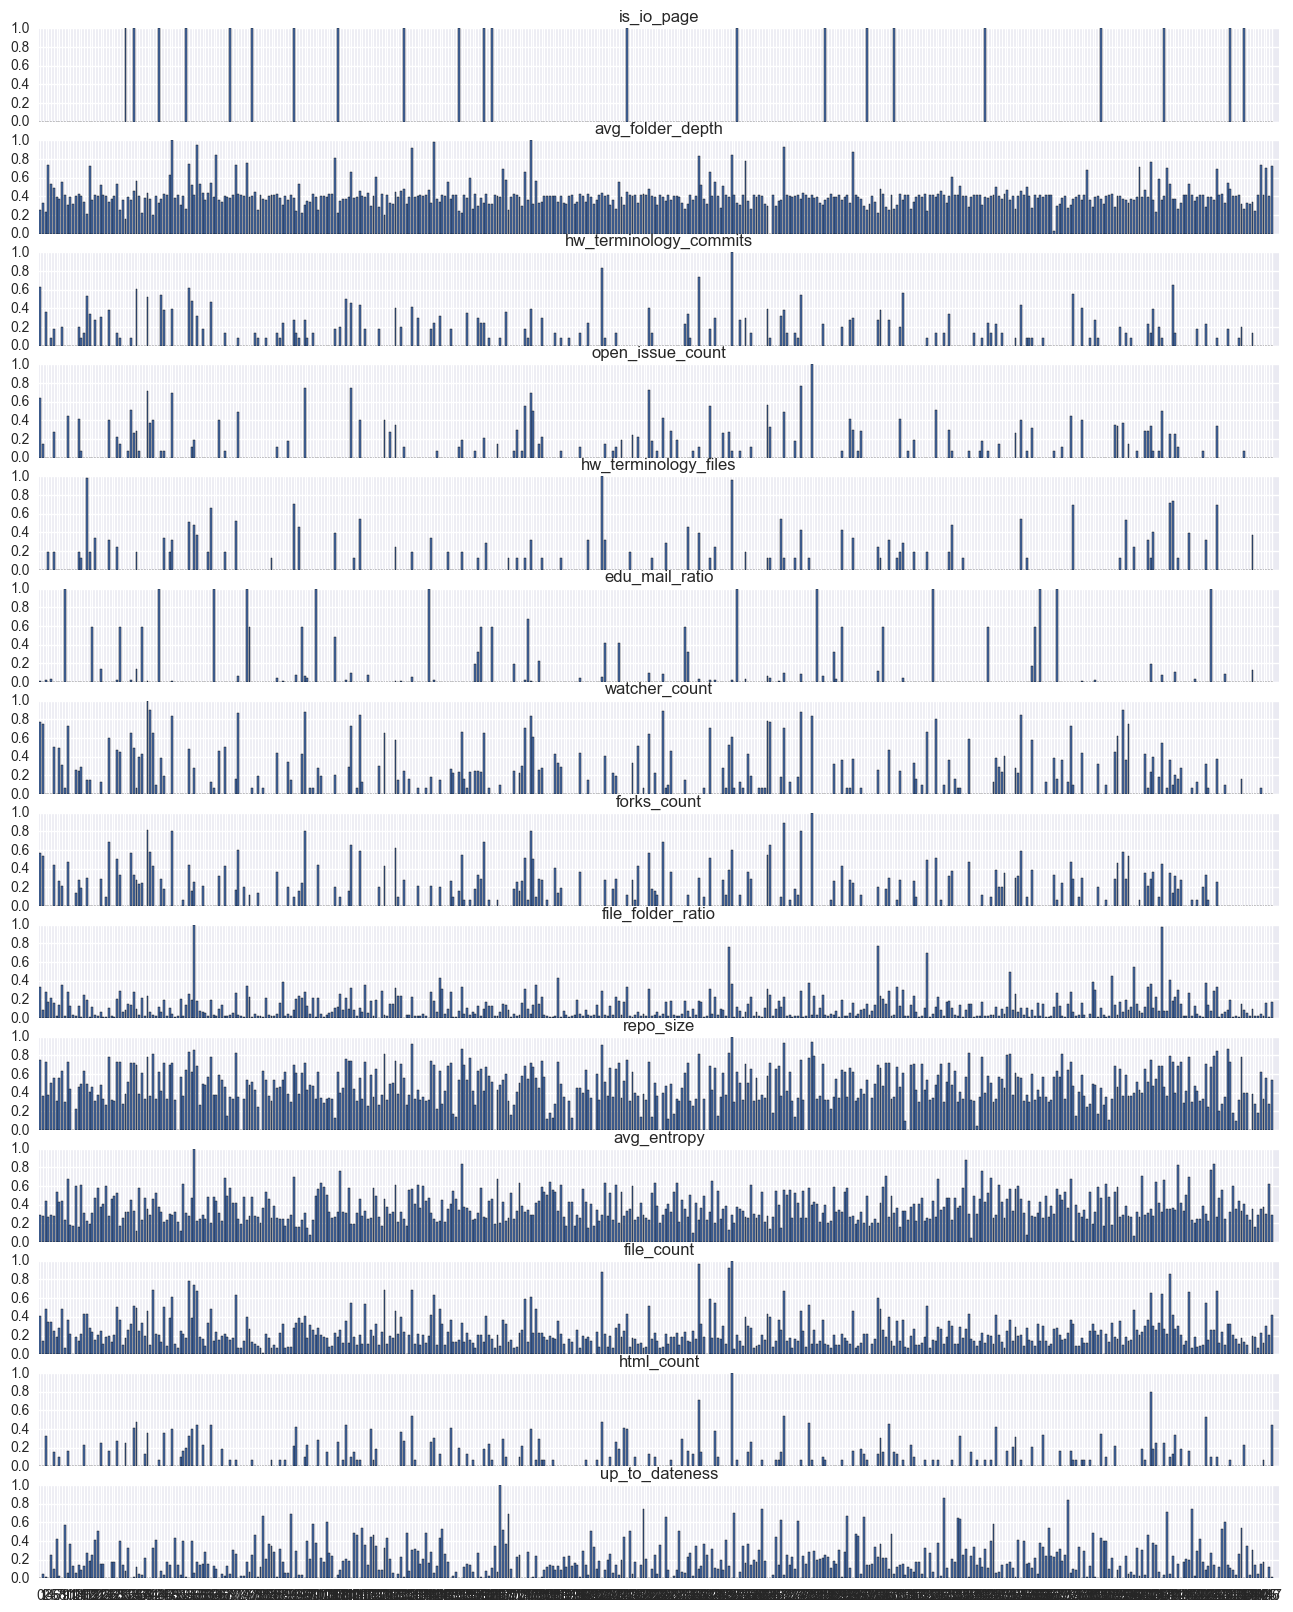

In [17]:
bar_plots(X)